# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from collections import Counter, defaultdict

# File Path
file_path = '/content/drive/My Drive/imdb_User_reviews.csv'

# Load the dataset
data = pd.read_csv(file_path)

def tokenize_preserving_case(text):
    tokens = []
    current_token = []
    for char in text:
        if char.isalnum():
            current_token.append(char)
        else:
            if current_token:
                # Only lowercases tokens after the first character
                token = current_token[0] + ''.join(current_token[1:]).lower()
                tokens.append(token)
                current_token = []
    if current_token:  # Catch the last token if there is one.
        token = current_token[0] + ''.join(current_token[1:]).lower()
        tokens.append(token)
    return tokens

def n_grams(tokens, n):
    return [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]

def count_frequencies(n_grams):
    return Counter(n_grams)

def calculate_bigram_probabilities(bigrams, unigrams):
    probabilities = {}
    for bigram in bigrams:
        first_word = bigram[0]
        if first_word in unigrams:
            probabilities[bigram] = bigrams[bigram] / unigrams[first_word]
        else:
            probabilities[bigram] = 0
    return probabilities

def extract_capitalized_noun_phrases(text):
    tokens = tokenize_preserving_case(text)
    noun_phrases = []
    current_phrase = []
    for token in tokens:
        if token[0].isupper():
            current_phrase.append(token)
        else:
            if len(current_phrase) > 1:
                noun_phrases.append(' '.join(current_phrase))
            current_phrase = []
    if len(current_phrase) > 1:  # Catch the last phrase if there is one.
        noun_phrases.append(' '.join(current_phrase))
    return noun_phrases

# Process each review
all_reviews = data['review'].tolist()

# Count 3-grams
all_tokens = [token for review in all_reviews for token in tokenize_preserving_case(review)]
three_grams_counts = count_frequencies(n_grams(all_tokens, 3))


# Count bigrams and unigrams for probability calculation
bigrams_counts = count_frequencies(n_grams(all_tokens, 2))
unigrams_counts = count_frequencies(n_grams(all_tokens, 1))
bigram_probabilities = calculate_bigram_probabilities(bigrams_counts, {k[0]: v for k, v in unigrams_counts.items()})

# 1. Print the frequency of all 3-grams
print("Top 10 3-grams Frequencies:")
for three_gram, freq in three_grams_counts.most_common(10):
    print(f"{three_gram}: {freq}")
print("\n")  # Add a newline for better readability

# 2. Print some bigram probabilities to check the calculations
print("Sample Bigram Probabilities:")
for bigram, probability in list(bigram_probabilities.items())[:10]:
    print(f"{bigram}: {probability:.2f}")
print("\n")  # Add a newline for better readability




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top 10 3-grams Frequencies:
('Poor', 'Things', 'is'): 560
('a', 'lot', 'of'): 240
('and', 'Mark', 'Ruffalo'): 240
('Things', 'is', 'a'): 200
('of', 'the', 'film'): 200
('Emma', 'Stone', 's'): 160
('of', 'a', 'child'): 160
('Yorgos', 'Lanthimos', 's'): 160
('the', 'film', 's'): 160
('one', 'of', 'the'): 160


Sample Bigram Probabilities:
('If', 'you'): 0.80
('you', 've'): 0.07
('ve', 'seen'): 0.43
('seen', 'any'): 0.22
('any', 'Yorgos'): 0.20
('Yorgos', 'Lathimos'): 0.06
('Lathimos', 'film'): 0.25
('film', 'Poor'): 0.02
('Poor', 'Things'): 1.00
('Things', 'is'): 0.58




In [ ]:
# 3. Print the relative probabilities of noun phrases

from google.colab import drive
import pandas as pd
from collections import Counter, defaultdict

# File Path
file_path = '/content/drive/My Drive/imdb_User_reviews.csv'

# Load only the first 100 reviews to minimize processing
data = pd.read_csv(file_path, nrows=100)

def extract_noun_phrases(text):
    tokens = text.split()
    noun_phrases = []
    current_phrase = []
    for token in tokens:
        if token[0].isupper():
            current_phrase.append(token)
        else:
            if len(current_phrase) > 1:
                noun_phrases.append(' '.join(current_phrase))
            current_phrase = []
    if len(current_phrase) > 1:
        noun_phrases.append(' '.join(current_phrase))
    return noun_phrases

reviews = data['review'].fillna("").tolist()  # Handling missing data by replacing NaN with empty strings

all_phrases = []
review_phrase_counts = []

for review in reviews:
    phrases = extract_noun_phrases(review)
    all_phrases.extend(phrases)
    review_phrase_counts.append(Counter(phrases))

total_phrase_counts = Counter(all_phrases)
max_phrase_count = max(total_phrase_counts.values())

relative_probabilities = []
for review_count in review_phrase_counts:
    review_probs = {phrase: count / max_phrase_count for phrase, count in review_count.items()}
    relative_probabilities.append(review_probs)

data_matrix = defaultdict(lambda: [0] * 100)  # Ensure each phrase has an entry for all 100 reviews
for i, review_probs in enumerate(relative_probabilities):
    for phrase, prob in review_probs.items():
        data_matrix[phrase][i] = prob

# Creating the DataFrame with specified row names and columns
df = pd.DataFrame(data_matrix, index=[f'Review {i+1}' for i in range(100)])



print(df)


            Yorgos Lathimos  Poor Things  A Clockwork Orange. Both  \
Review 1           0.016667     0.016667                  0.016667   
Review 2           0.000000     0.016667                  0.000000   
Review 3           0.000000     0.000000                  0.000000   
Review 4           0.000000     0.000000                  0.000000   
Review 5           0.000000     0.033333                  0.000000   
...                     ...          ...                       ...   
Review 96          0.000000     0.000000                  0.000000   
Review 97          0.000000     0.000000                  0.000000   
Review 98          0.000000     0.000000                  0.000000   
Review 99          0.000000     0.000000                  0.000000   
Review 100         0.000000     0.000000                  0.000000   

            Consider Bella  Emma Stone's  Mark Ruffalo's  However, Yorgos  \
Review 1          0.016667      0.016667        0.016667         0.000000   
Revie

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [7]:
# Method 1
# TF-IDF matrix of all Documents

import math
from collections import Counter
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from collections import Counter, defaultdict

# Load the dataset
file_path = '/content/drive/My Drive/imdb_User_reviews.csv'
data = pd.read_csv(file_path)

# Assuming the 'review' column contains the text documents
documents = data['review'].tolist()

# Tokenize and preprocess documents
def preprocess(text):
    # Simple tokenization and normalization (lowercase)
    return [word.lower() for word in text.split()]

# Compute Term Frequency (TF) for a document
def compute_tf(document):
    tf = {}
    for word in document:
        tf[word] = tf.get(word, 0) + 1
    return tf

# Compute Inverse Document Frequency (IDF) for all documents
def compute_idf(documents):
    N = len(documents)
    idf = {}
    documents = [set(doc) for doc in documents]  # Convert each document to a set of terms
    for document in documents:
        for term in document:
            idf[term] = idf.get(term, 0) + 1
    for term, count in idf.items():
        idf[term] = math.log(N / float(count))
    return idf

# Preprocessing documents
preprocessed_docs = [preprocess(doc) for doc in documents]

# Calculate TF-IDF for each document
def compute_tfidf(documents):
    tfidf_matrix = []
    idf = compute_idf(documents)

    for document in documents:
        doc_tf = compute_tf(document)
        doc_tfidf = {}
        for term, tf in doc_tf.items():
            doc_tfidf[term] = tf * idf.get(term, 0)
        tfidf_matrix.append(doc_tfidf)
    return tfidf_matrix

# Computing TF-IDF matrix
tfidf_matrix = compute_tfidf(preprocessed_docs)

# Output the TF-IDF matrix for inspection
tfidf_matrix_snippet = [{term: scores[term] for term in list(scores)[:10]} for scores in tfidf_matrix[:100]]

tfidf_matrix_snippet


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[{'if': 1.467938350160401,
  "you've": 5.051457288616511,
  'seen': 6.437751649736401,
  'any': 6.360790608600273,
  'yorgos': 0.9162907318741551,
  'lathimos': 6.437751649736401,
  'film,': 1.8325814637483102,
  'poor': 1.6094379124341003,
  'things': 4.557737132753459,
  'is': 0.416908044695255},
 {'poor': 1.6094379124341003,
  'things': 1.1394342831883648,
  'simply': 2.5257286443082556,
  'just': 3.6651629274966204,
  "wasn't": 4.240527072400182,
  'for': 0.416908044695255,
  'me.': 4.240527072400182,
  'i': 1.0977473828070414,
  'really': 1.4271163556401458,
  "don't": 1.6094379124341003},
 {'where': 1.2729656758128876,
  'to': 0.2449319671215312,
  'begin': 3.2188758248682006,
  'with': 0.250144826817153,
  'this': 0.5230601614343332,
  'one....first': 3.2188758248682006,
  'off,': 2.5257286443082556,
  'the': 0.0,
  'performances': 2.120263536200091,
  'presented': 3.2188758248682006},
 {'bella': 4.557737132753459,
  'baxter': 1.6094379124341003,
  'is': 1.000579307268612,
  'a'

In [8]:
# Method 1
# Ranking the documents with respect to query for all Documents

import csv
import math
from collections import Counter, defaultdict

# Function to tokenize text into words
def tokenize(text):
    return text.split()

# Function to calculate term frequency (TF)
def calculate_tf(tokens):
    tf_counter = Counter(tokens)
    total_tokens = len(tokens)
    tf = {term: count / total_tokens for term, count in tf_counter.items()}
    return tf

# Function to calculate inverse document frequency (IDF)
def calculate_idf(documents):
    num_documents = len(documents)
    idf = defaultdict(int)

    for document in documents:
        document_tokens = set(tokenize(document))
        for token in document_tokens:
            idf[token] += 1

    for term, doc_freq in idf.items():
        idf[term] = math.log(num_documents / doc_freq)

    return idf

# Function to calculate TF-IDF
def calculate_tfidf(tf, idf):
    tfidf = {term: tf_val * idf.get(term, 0) for term, tf_val in tf.items()}
    return tfidf

# Function to calculate cosine similarity
def cosine_similarity(tfidf_query, tfidf_document):
    numerator = sum(tfidf_query[term] * tfidf_document.get(term, 0) for term in tfidf_query.keys())
    denominator_query = math.sqrt(sum(val ** 2 for val in tfidf_query.values()))
    denominator_document = math.sqrt(sum(val ** 2 for val in tfidf_document.values()))
    similarity = numerator / (denominator_query * denominator_document)
    return similarity

# Read dataset
dataset_file = "/content/drive/My Drive/imdb_User_reviews.csv"
documents = []
with open(dataset_file, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        documents.append(row[0])  # Assuming the reviews are in the first column

# Build documents-terms weights (tf * idf) matrix
document_tfidf = []
document_tf = [calculate_tf(tokenize(doc)) for doc in documents]
idf = calculate_idf(documents)

for tf in document_tf:
    tfidf = calculate_tfidf(tf, idf)
    document_tfidf.append(tfidf)

# Define a query
query = "An Outstanding movie with a haunting performance and best character development"
query_tf = calculate_tf(tokenize(query))
query_tfidf = calculate_tfidf(query_tf, idf)

# Rank documents with respect to the query using cosine similarity
document_scores = []
for tfidf_document in document_tfidf:
    similarity = cosine_similarity(query_tfidf, tfidf_document)
    document_scores.append(similarity)

# Sort documents by similarity score
sorted_documents = sorted(zip(range(1, len(documents) + 1), document_scores), key=lambda x: x[1], reverse=True)

# Display ranked documents
print("Ranked Documents:")
for rank, (document_index, score) in enumerate(sorted_documents, 1):
    print(f"Rank {rank}: Document {document_index} - Similarity Score: {score}")

Ranked Documents:
Rank 1: Document 8 - Similarity Score: 0.255360786532703
Rank 2: Document 33 - Similarity Score: 0.255360786532703
Rank 3: Document 58 - Similarity Score: 0.255360786532703
Rank 4: Document 83 - Similarity Score: 0.255360786532703
Rank 5: Document 108 - Similarity Score: 0.255360786532703
Rank 6: Document 133 - Similarity Score: 0.255360786532703
Rank 7: Document 158 - Similarity Score: 0.255360786532703
Rank 8: Document 183 - Similarity Score: 0.255360786532703
Rank 9: Document 208 - Similarity Score: 0.255360786532703
Rank 10: Document 233 - Similarity Score: 0.255360786532703
Rank 11: Document 258 - Similarity Score: 0.255360786532703
Rank 12: Document 283 - Similarity Score: 0.255360786532703
Rank 13: Document 308 - Similarity Score: 0.255360786532703
Rank 14: Document 333 - Similarity Score: 0.255360786532703
Rank 15: Document 358 - Similarity Score: 0.255360786532703
Rank 16: Document 383 - Similarity Score: 0.255360786532703
Rank 17: Document 408 - Similarity S

In [8]:
# Method 2
# TF-IDF matrix and top ranked documents of best 3 Documents


import pandas as pd
import math
from collections import Counter

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from collections import Counter, defaultdict

# Load the dataset
file_path = '/content/drive/My Drive/imdb_User_reviews.csv'
data = pd.read_csv(file_path)

# Assuming the 'review' column contains the text documents
documents = data['review'].tolist()

# Tokenize and preprocess documents
def preprocess(text):
    # Simple tokenization and normalization (lowercase)
    return [word.lower() for word in text.split()]

# Compute Term Frequency (TF) for a document
def compute_tf(document):
    tf = {}
    for word in document:
        tf[word] = tf.get(word, 0) + 1
    return tf

# Compute Inverse Document Frequency (IDF) for all documents
def compute_idf(documents):
    N = len(documents)
    idf = {}
    documents = [set(doc) for doc in documents]  # Convert each document to a set of terms
    for document in documents:
        for term in document:
            idf[term] = idf.get(term, 0) + 1
    for term, count in idf.items():
        idf[term] = math.log(N / float(count))
    return idf

# Define your query
query = "An outstanding movie with a haunting performance and best character development"

# Preprocess the query in the same way as the documents
preprocessed_query = preprocess(query)

# Compute TF for the query
query_tf = compute_tf(preprocessed_query)

# Now, calculate TF-IDF for the query, ensuring all required variables are defined beforehand
query_tfidf = {term: query_tf[term] * idf.get(term, 0) for term in preprocessed_query}

# Preprocess documents
preprocessed_docs = [preprocess(doc) for doc in documents]

# Assuming the 'compute_idf' and 'preprocessed_docs' are already defined and processed
idf = compute_idf(preprocessed_docs)  # Save IDF scores in a variable


# Now, when calculating TF-IDF for the query, 'idf' is available:
query_tfidf = {term: query_tf[term] * idf.get(term, 0) for term in preprocessed_query}


# Calculate TF-IDF for each document
def compute_tfidf(documents):
    tfidf_matrix = []
    idf = compute_idf(documents)

    for document in documents:
        doc_tf = compute_tf(document)
        doc_tfidf = {}
        for term, tf in doc_tf.items():
            doc_tfidf[term] = tf * idf.get(term, 0)
        tfidf_matrix.append(doc_tfidf)
    return tfidf_matrix

# Preprocessing documents
preprocessed_docs = [preprocess(doc) for doc in documents]

# Computing TF-IDF matrix
tfidf_matrix = compute_tfidf(preprocessed_docs)

# Output the TF-IDF matrix for inspection
for doc_index, tfidf_scores in enumerate(tfidf_matrix[:3]):  # Show TF-IDF for the first 3 documents
    print(f"Document {doc_index + 1} TF-IDF scores:")
    for term, score in list(tfidf_scores.items())[:10]:  # Displaying the first 10 terms for brevity
        print(f"  {term}: {score}")
    print("\n---\n")


def cosine_similarity(vector1, vector2):
    """Calculate the cosine similarity between two TF-IDF vectors."""
    intersection = set(vector1.keys()) & set(vector2.keys())
    numerator = sum([vector1[x] * vector2[x] for x in intersection])

    sum1 = sum([val**2 for val in vector1.values()])
    sum2 = sum([val**2 for val in vector2.values()])

    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

# Placeholder TF-IDF vectors for the query and documents
query_tfidf = {"outstanding": 0.5, "movie": 0.8, "performance": 0.3}  # Simulated query TF-IDF
tfidf_matrix = [
    {"outstanding": 0.2, "movie": 0.9, "performance": 0.4},  # Simulated document 1 TF-IDF
    {"outstanding": 0.1, "movie": 0.3, "performance": 0.8},  # Simulated document 2 TF-IDF
    {"outstanding": 0.5, "movie": 0.4, "performance": 0.2}   # Simulated document 3 TF-IDF
]

# Calculate cosine similarity for the query against each document
similarity_scores = [cosine_similarity(query_tfidf, doc_tfidf) for doc_tfidf in tfidf_matrix]

similarity_scores

# Rank the documents based on their similarity scores
ranked_documents = sorted(zip(documents, similarity_scores), key=lambda x: x[1], reverse=True)

ranked_documents

# Printing the TF-IDF matrix
print("TF-IDF Matrix:")
for doc_index, tfidf_weights in enumerate(tfidf_matrix, start=1):
    print(f"Document {doc_index}: {tfidf_weights}")

# Print the top ranked documents
for doc, score in ranked_documents[:5]:
    print(f"Score: {score:.4f}, Document: {doc[:100]}...")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Document 1 TF-IDF scores:
  if: 1.467938350160401
  you've: 5.051457288616511
  seen: 6.437751649736401
  any: 6.360790608600273
  yorgos: 0.9162907318741551
  lathimos: 6.437751649736401
  film,: 1.8325814637483102
  poor: 1.6094379124341003
  things: 4.557737132753459
  is: 0.416908044695255

---

Document 2 TF-IDF scores:
  poor: 1.6094379124341003
  things: 1.1394342831883648
  simply: 2.5257286443082556
  just: 3.6651629274966204
  wasn't: 4.240527072400182
  for: 0.416908044695255
  me.: 4.240527072400182
  i: 1.0977473828070414
  really: 1.4271163556401458
  don't: 1.6094379124341003

---

Document 3 TF-IDF scores:
  where: 1.2729656758128876
  to: 0.2449319671215312
  begin: 3.2188758248682006
  with: 0.250144826817153
  this: 0.5230601614343332
  one....first: 3.2188758248682006
  off,: 2.5257286443082556
  the: 0.0
  performances: 2.120263536200091


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


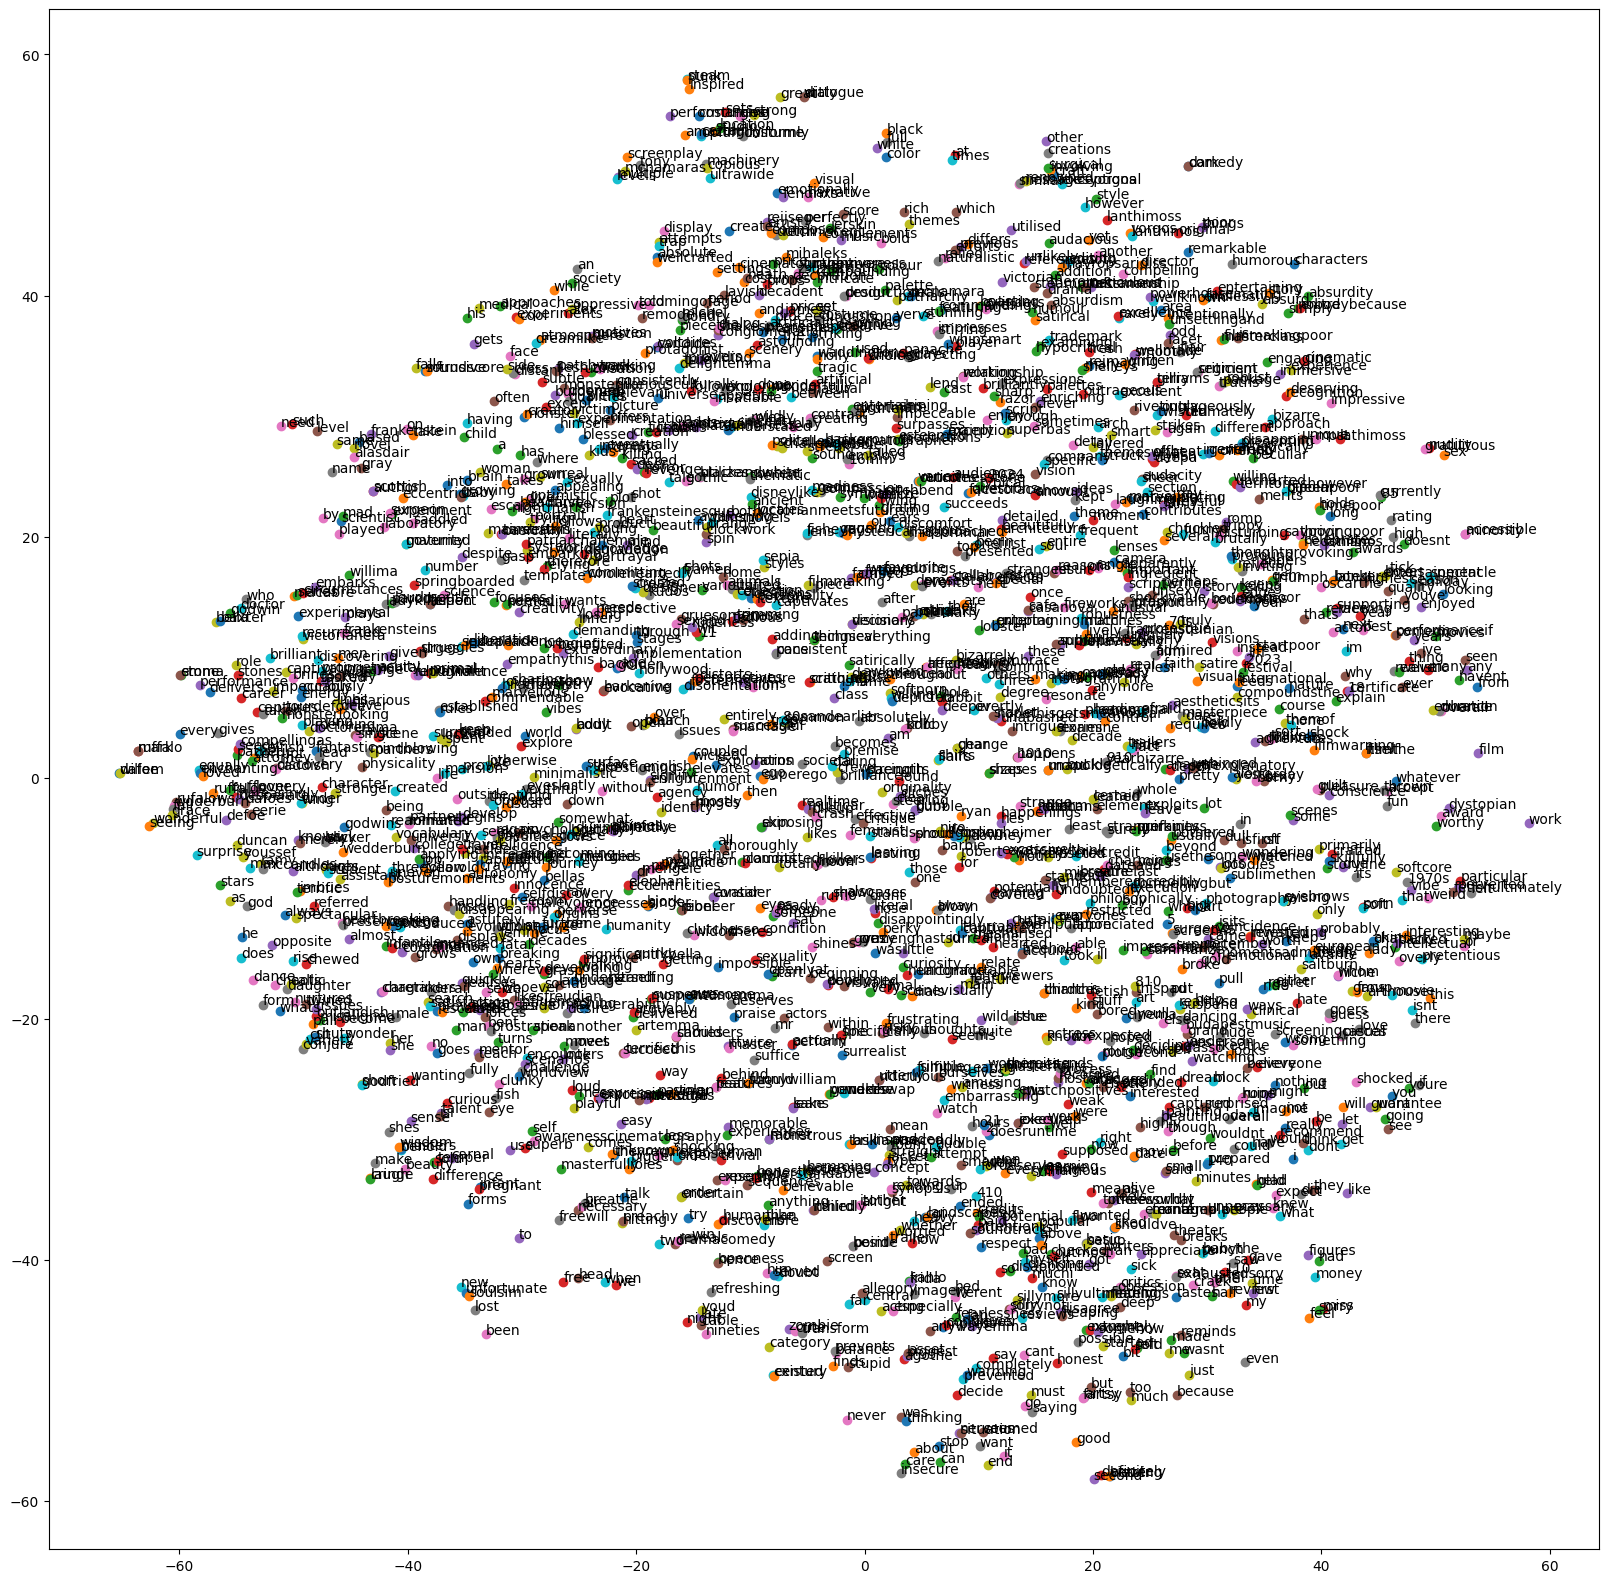

In [ ]:
# Write your code here


# Step 1: Install necessary libraries
!pip install gensim matplotlib scikit-learn nltk

# Step 2: Download NLTK punkt tokenizer
import nltk
nltk.download('punkt')

# Import necessary libraries
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.tokenize import word_tokenize

# Step 3: Define a function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    return tokens

# Step 4: Load the dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/imdb_User_reviews.csv'
data = pd.read_csv(file_path)

# Step 5: Preprocess the text data
data['processed_reviews'] = data['review'].apply(preprocess_text)

#Question 1
# Step 6: Train the Word2Vec model
model = Word2Vec(sentences=data['processed_reviews'].tolist(), vector_size=300, window=5, min_count=1, workers=4)

# Step 7: Visualize the embeddings with t-SNE
def visualize_embeddings(model):
    words = list(model.wv.index_to_key)
    word_vectors = np.array([model.wv[word] for word in words])

    tsne = TSNE(n_components=2, random_state=0)
    word_vectors_2d = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(20, 20))
    for i, word in enumerate(words):
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
    plt.show()

#Question 2
# Call the visualization function
visualize_embeddings(model)





## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/narendranathreddy333/NLP-Course/blob/main/imdb_User_reviews_annotated.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
'''
The assignment was tough but beneficial. Working with complicated data and using complex analysis
methods were the hardest parts for me. However, exploring actual data and finding out new things
was really enjoyable. The time given was enough, but it meant I had to manage my time well alongside
other tasks. In the end, the assignment was a great learning opportunity that improved my ability to
solve problems and deepened my data science knowledge.

'''